In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Regressor linear

In [2]:
circular_database = pd.read_csv('./data/processed/circular_database.csv', index_col='Unnamed: 0')
circular_database['avg_temperature'] = circular_database[['max_temperature','min_temperature']].mean(axis=1)
circular_database['delta_temperature'] = circular_database['max_temperature'] - circular_database['min_temperature']
circular_database.drop(columns=['max_temperature','min_temperature'], inplace=True)
circular_database.sample(5)

,week,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,...,month_8,month_9,month_10,month_11,month_12,precipitation,8012,8022,avg_temperature,delta_temperature
2016-05-05,18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.0,4280.0,3602.0,20.15,9.3
2014-12-08,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,3948.0,3017.0,26.05,11.5
2013-10-14,42,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.0,4206.0,3212.0,25.35,10.9
2015-11-21,47,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,7.2,748.0,707.0,20.80,7.2
2019-03-16,11,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1.5,1116.0,1371.0,24.80,8.0


Coefficients: 
                              0
week                 42.925879
weekday_0          1317.778194
weekday_1          1626.989420
weekday_2          1569.333807
weekday_3          1507.938704
weekday_4          1058.774866
weekday_5         -2906.229446
weekday_6         -4174.585546
month_1            -670.758940
month_2             647.448062
month_3            1497.098453
month_4            1090.969501
month_5             973.212056
month_6              30.113831
month_7           -1391.819062
month_8             587.589613
month_9             179.000421
month_10           -153.527092
month_11           -725.806797
month_12          -2063.520047
precipitation        -3.232250
avg_temperature     -62.797611
delta_temperature    44.822450 

Mean squared error:	3087963.10
RMS:	1757.26
Variance score:	0.66


Text(0, 0.5, 'Eq')

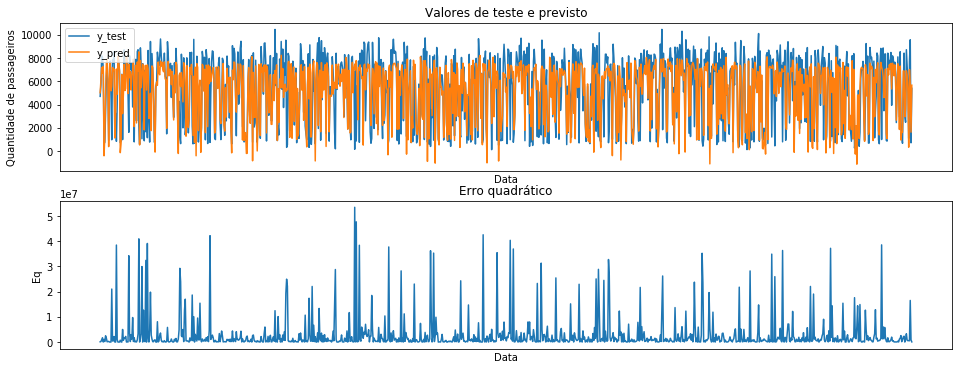

In [3]:
X = circular_database.drop(columns=['8012','8022'])
y = circular_database[['8012','8022']].sum(axis=1)
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

##Results
# The coefficients
print('Coefficients: \n', pd.DataFrame(regr.coef_, index=X.columns), '\n')
# The mean squared error
print("Mean squared error:\t%.2f" % mean_squared_error(y_test, y_pred))
# RMS
print("RMS:\t%.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score (1 is perfect prediction)
print('Variance score:\t%.2f' % r2_score(y_test, y_pred))
# Plot outputs
df = pd.DataFrame(index=y_test.index, columns=['y_test', 'y_pred'])
df['y_test'] = y_test
df['y_pred'] = y_pred
df.sort_index()

plt.figure(figsize=(16,6))

ax0 = plt.subplot(211)
plt.title('Valores de teste e previsto')
plt.plot(df.index, df['y_test'], df.index, df['y_pred'])
plt.xticks(())
plt.xlabel('Data')
plt.ylabel('Quantidade de passageiros')
plt.legend(['y_test', 'y_pred'])

plt.subplot(212, sharex=ax0)
plt.title('Erro quadrático')
plt.plot(df.index, np.square(df['y_test']-df['y_pred']))
plt.xticks(())
plt.xlabel('Data')
plt.ylabel('Eq')